* Возьмите датасет с цветками iris’а (функция load_iris из библиотеки sklearn)
* Оставьте два признака - sepal_length и sepal_width и целевую переменную - variety
* Разделите данные на выборку для обучения и тестирования
* Постройте модель LDA
* Визуализируйте предсказания для тестовой выборки и центры классов
* Отбросьте целевую переменную и оставьте только два признака - sepal_length и sepal_width
* Подберите оптимальное число кластеров для алгоритма kmeans и визуализируйте полученную кластеризацию

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors

from pylab import rcParams
rcParams['figure.figsize'] = 10, 6

In [2]:
# грузим исходные данные
iris = load_iris()
# print(iris.DESCR)
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data['variety'] = iris.target
data.drop(data.columns[[2,3]], axis = 1, inplace = True)
# data.drop(data.columns[[0,1]], axis = 1, inplace = True)
data.tail()

,sepal length (cm),sepal width (cm),variety
145,6.7,3.0,2
146,6.3,2.5,2
147,6.5,3.0,2
148,6.2,3.4,2
149,5.9,3.0,2


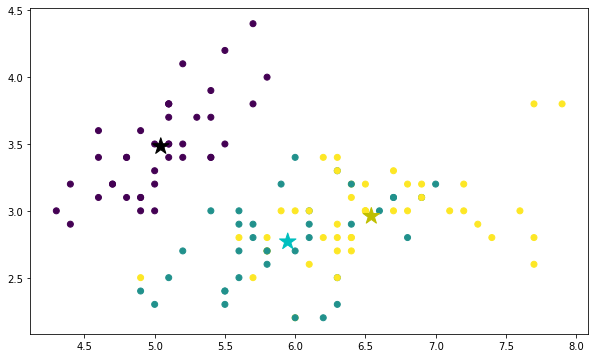

In [3]:
# LDA train
data_train, data_test = train_test_split(data, test_size=0.2)
y_train, y_test = data_train['variety'], data_test['variety']
del data_train['variety']
del data_test['variety']

lda = LinearDiscriminantAnalysis()
lda.fit(data_train, y_train)
plt.scatter(data_train['sepal length (cm)'], data_train['sepal width (cm)'], c=y_train)
# plt.scatter(data_train['petal length (cm)'], data_train['petal width (cm)'], c=y_train)
plt.scatter(lda.means_[:, 0], lda.means_[:, 1], c=['k','c','y'], s=300, marker='*')
plt.show()

	Accuracy:  0.8333333333333334


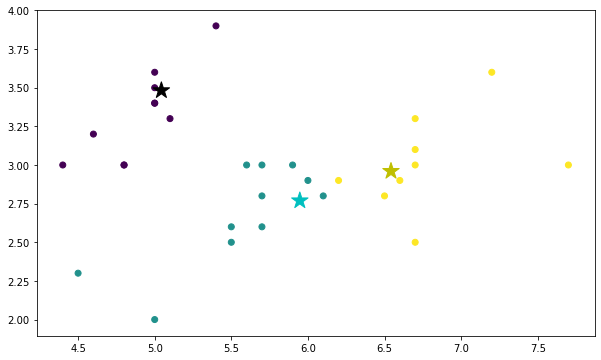

In [4]:
# LDA predict
print('\tAccuracy: ', accuracy_score(y_test, lda.predict(data_test)))
plt.scatter(data_test['sepal length (cm)'], data_test['sepal width (cm)'], c=lda.predict(data_test))
plt.scatter(lda.means_[:, 0], lda.means_[:, 1], c=['k','c','y'], s=300, marker='*')
plt.show()

In [5]:
# Качество предсказания ниже, чем с petal length, petal width (корреляция с target у них намного выше)

In [6]:
# Кластеризация (на всей выборке)
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data.drop(data.columns[[2,3]], axis = 1, inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
dtypes: float64(2)
memory usage: 2.5 KB


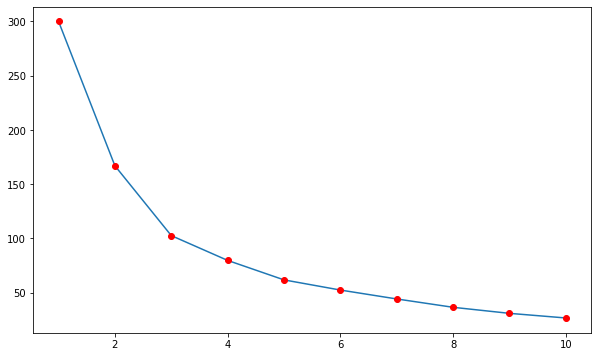

In [7]:
# не уверен, что тут нужна нормализация - величины очень близкие по порядку - но вай нот
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

k_inertia = []
ks = range(1,11)

for k in ks:
    kmeans = KMeans(n_clusters=k)
    clusters = kmeans.fit_predict(data_scaled)
    k_inertia.append(kmeans.inertia_)

plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')
plt.show()

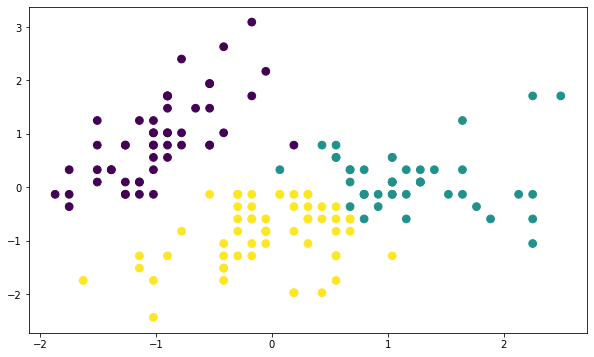

In [8]:
# в целом, изгиб не так очевиден - можно и 3 и 4 кластера взять, но остановимся на 3х
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(data_scaled)
plt.scatter(data_scaled[:, 0], data_scaled[:, 1],c=clusters, s=60)
plt.show()